# Visualisation of Customer Segmentation Result

# 1. Import Relevant Libraries and Datasets

## 1.1 Import Relevant Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.2 Import Relevant Datasets

In [73]:
original_df = pd.read_csv("../../data/processed/banking_behaviour_preference_original.csv")
segmentation_result_df = pd.read_csv("../../data/processed/segmentation_result_static_original.csv")

# join the table of customer information and the table of customer segmentation
final_df = pd.merge(original_df, segmentation_result_df, on='CLIENTNUM')

### 1.2.1 Segment Mapping

Restore the original descriptive coding of the segments for clearer visualisation.

In [74]:
segment_mapping = {
    1: "Minimal Engagers",
    2: "Casual Browers",
    3: "Loyal Savers",
    4: "Affluent Observers",
    5: "Premier Partners"
}

final_df.loc[:, 'Segment'] = final_df['Segment'].map(segment_mapping)

/var/folders/yn/5n1n65mx1gj_05gy9sfw9y4c0000gn/T/ipykernel_37309/2095615677.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Casual Browers' 'Casual Browers' 'Casual Browers' ...
 'Affluent Observers' 'Casual Browers' 'Casual Browers']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  final_df.loc[:, 'Segment'] = final_df['Segment'].map(segment_mapping)


# 2. Visualisation

## 2.1 Visualisation for Product Usage

### 2.1.1 Bar Plot for Product Usage across All Segments

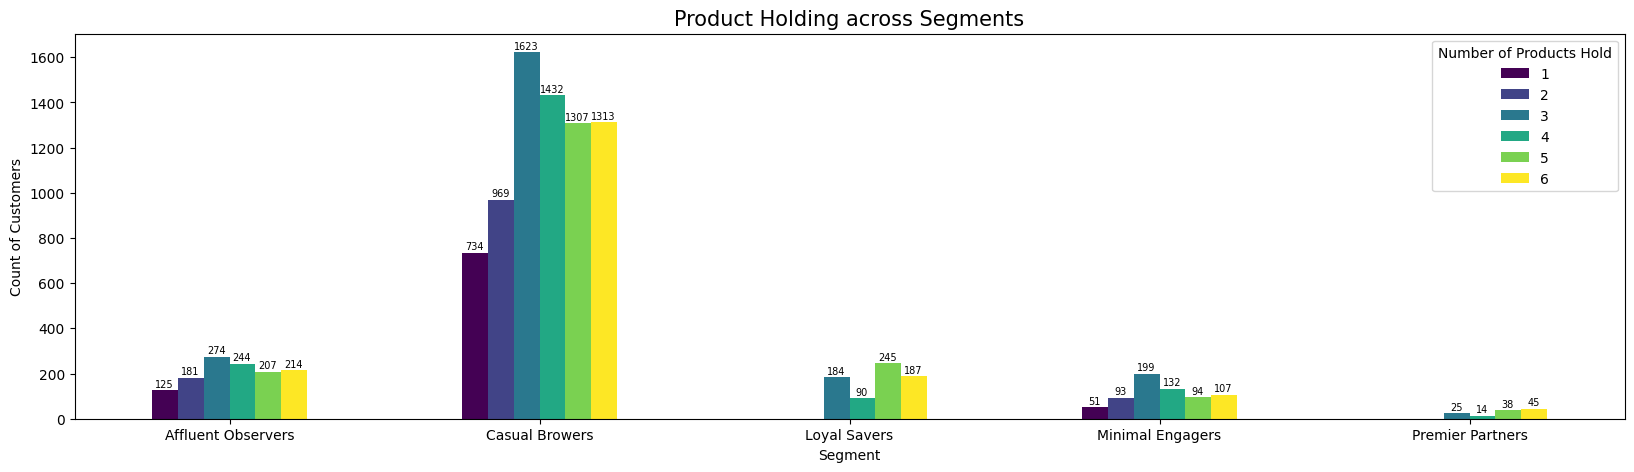

In [96]:
product_usage_df = final_df.groupby('Segment')['No_of_product'].value_counts().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(20, 5))

product_usage_df.plot(kind='bar', ax=ax, colormap='viridis')

for i in range(product_usage_df.shape[0]):
    for j in range(product_usage_df.shape[1]):
        count = product_usage_df.iat[i, j]
        if count != 0:
            ax.text(i+(j/product_usage_df.shape[1]-0.5)*0.5+0.04, count+5, count,
                    ha='center', va='bottom', fontsize=7)

ax.set_xlabel('Segment', fontsize=10)
ax.set_ylabel('Count of Customers', fontsize=10)
ax.legend(title = 'Number of Products Hold')
plt.title('Product Holding across Segments', fontsize=15)
plt.xticks(rotation=0)
plt.show()

### 2.1.2 Bar Plot for Product Usage across Non-Default Segments

The default segment, **Casual Browers**, contains much more customers than the other 4 categories. Hence, we make an additional plot for **the non-default segments only** for a clearer visualisation.

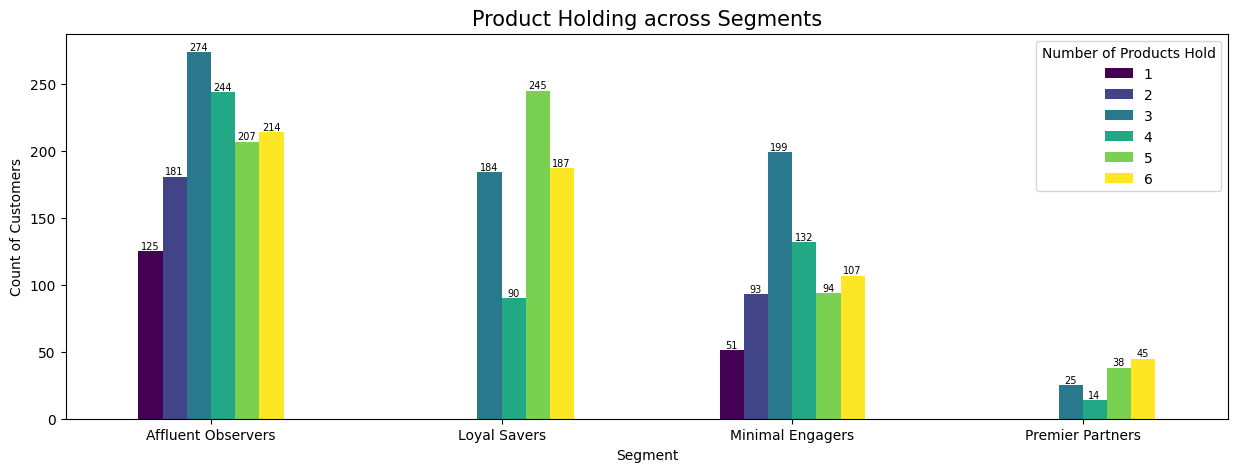

In [95]:
product_usage_df_nondefault = product_usage_df[product_usage_df.index != 'Casual Browers']

fig, ax = plt.subplots(figsize=(15, 5))

product_usage_df_nondefault.plot(kind='bar', ax=ax, colormap='viridis')

for i in range(product_usage_df_nondefault.shape[0]):
    for j in range(product_usage_df_nondefault.shape[1]):
        count = product_usage_df_nondefault.iat[i, j]
        if count != 0:
            ax.text(i+(j/product_usage_df_nondefault.shape[1]-0.5)*0.5+0.04, count, count,
                    ha='center', va='bottom', fontsize=7)

ax.set_xlabel('Segment', fontsize=10)
ax.set_ylabel('Count of Customers', fontsize=10)
ax.legend(title = 'Number of Products Hold')
plt.title('Product Holding across Segments', fontsize=15)
plt.xticks(rotation=0)
plt.show()

### 2.1.3 Evaluation on Product Usage

All customers in **Loyal Savers** and **Premier Partners** have at least 3 products. However, **Loyal Savers** is the only segment that there are more customers holding 5 products instead of 6 products, and the gap does not seem trivial. This suggests an opportunity to encourage our loyal customers to hold more products.

Also, in all three other segments, the number of customers holding 3 products are always the most and the distribution skews to the right. One possible way of promotion is to provide benefits for customers holding at least 3 products to keep them loyal to the bank.

## 2.2 Visualisation for Transaction History

### 2.2.1 Visualisation for Transaction Amount across Segments

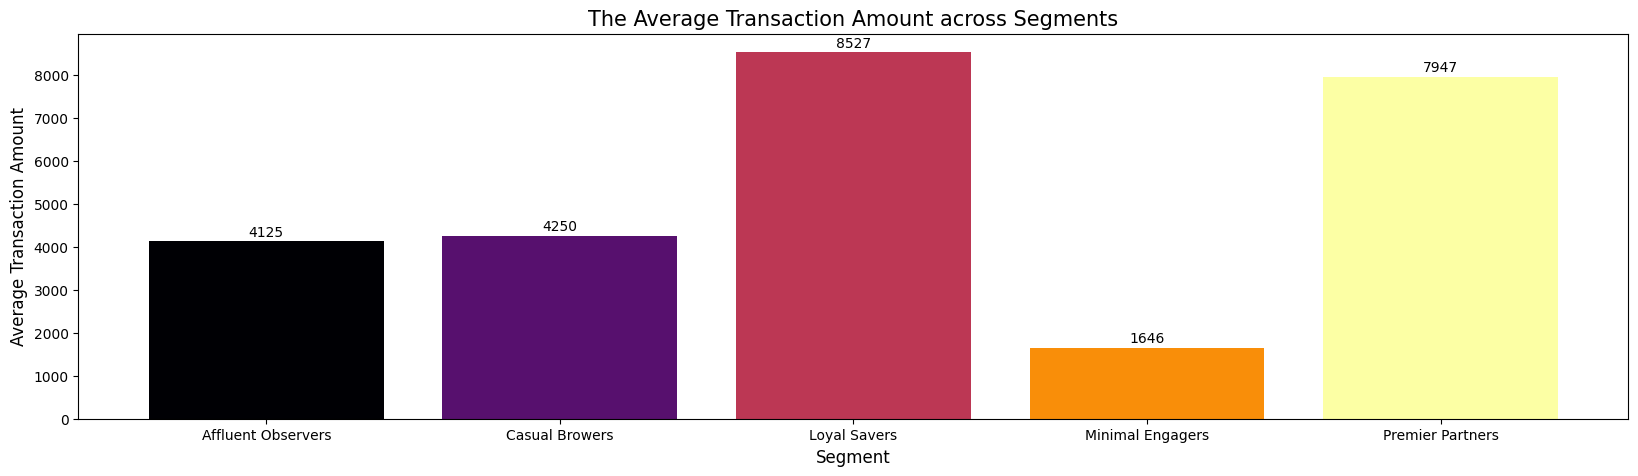

In [108]:
trans_amount_df = final_df.groupby('Segment')['Total_Trans_Amt'].mean()

fig, ax = plt.subplots(figsize=(20, 5))
colours = plt.cm.inferno(np.linspace(0, 1, len(trans_amount_df)))
bars = ax.bar(trans_amount_df.index, trans_amount_df.values, color=colours)
for bar in bars:
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+50, int(bar.get_height()),
            ha='center', va='bottom', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.set_xlabel('Segment', fontsize=12)
ax.set_ylabel('Average Transaction Amount', fontsize=12)
plt.title('The Average Transaction Amount across Segments', fontsize=15)
plt.show()

### 2.2.2 Visualisation for Transaction Count across Segments

/var/folders/yn/5n1n65mx1gj_05gy9sfw9y4c0000gn/T/ipykernel_37309/1945173859.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([segment.replace(', ', ',\n') for segment in trans_count_df.index.tolist()], rotation=0)


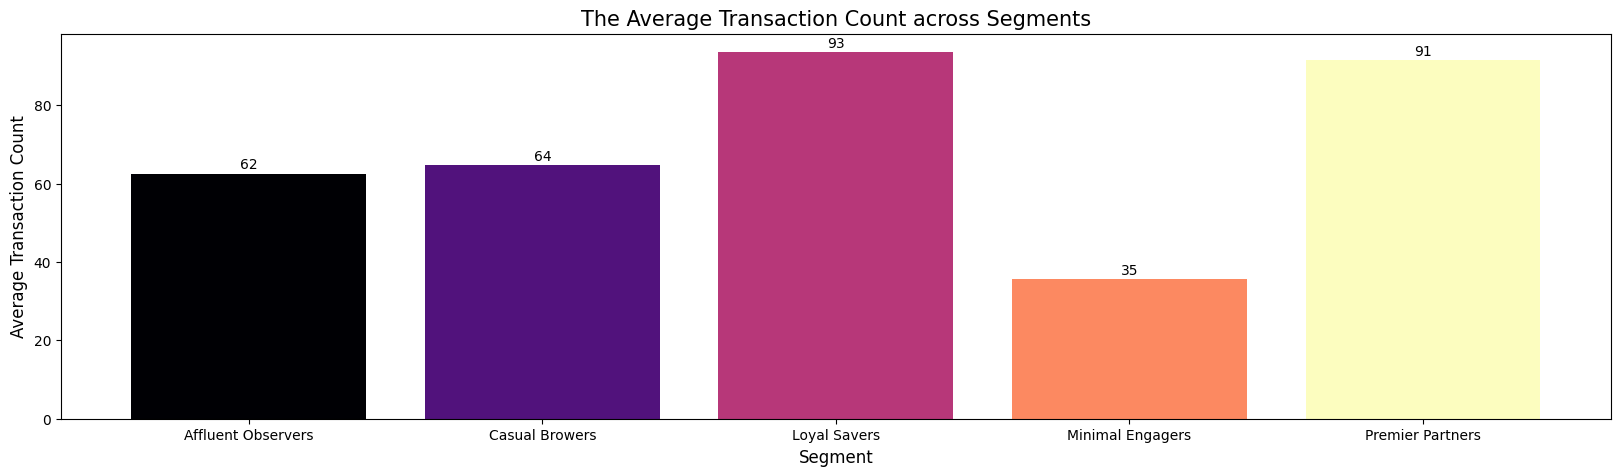

In [110]:
trans_count_df = final_df.groupby('Segment')['Total_Trans_Count'].mean()

fig, ax = plt.subplots(figsize=(20, 5))
colours = plt.cm.magma(np.linspace(0, 1, len(trans_count_df)))
bars = ax.bar(trans_count_df.index, trans_count_df.values, color=colours)
#trans_count_df.plot(kind='bar', ax=ax, color=colours)
for bar in bars:
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.5, int(bar.get_height()),
            ha='center', va='bottom', fontsize=10)
ax.set_xticklabels([segment.replace(', ', ',\n') for segment in trans_count_df.index.tolist()], rotation=0)
ax.tick_params(axis='both', labelsize=10)
ax.set_xlabel('Segment', fontsize=12)
ax.set_ylabel('Average Transaction Count', fontsize=12)
plt.title('The Average Transaction Count across Segments', fontsize=15)
plt.show()

## 2.2.3 Evaluation on Transaction History

Regarding transaction behavior, transaction amount and transaction count across the segments. Moreover, **Loyals Savers** and **Premier Partners**, which are high in **loyalty** score, are the highest in both transaction amount and transaction count. This suggests that **loyalty** correlates with more active transaction behaviours. Meanwhile, similar to product usage, **financial status** does not seem to play a significant role in transaction patterns. Hence, this underscores the value of fostering cusotmer **loyalty** and the importance of providing incentives for customers with high financial status.

## 2.3 Visualisation for Digital Engagement

### 2.3.1 Data Preprocessing

Use decriptive coding for the digital features for a clearer visualations. 

In [111]:
digital_df = final_df[['Digital_Capability', 'PhoneService', 'InternetService', 
                       'TechSupport', 'PaperlessBilling', 'PaymentMethod']]

digital_df.loc[:, 'PhoneService'] = \
    digital_df['PhoneService'].replace({0: 'No', 
                                        1: 'Yes'})
digital_df.loc[:, 'InternetService'] = \
    digital_df['InternetService'].replace({0: 'DSL', 
                                           1: 'Fiber Optic',
                                           2: 'No Internet Service'})
digital_df.loc[:, 'TechSupport'] = \
    digital_df['TechSupport'].replace({0: 'No', 
                                       1: 'No Internet Service',
                                       2: 'Yes'})
digital_df.loc[:, 'PaperlessBilling'] = \
    digital_df['PaperlessBilling'].replace({0: 'No', 
                                            1: 'Yes'})
digital_df.loc[:, 'PaymentMethod'] = \
    digital_df['PaymentMethod'].replace({0: 'Bank transfer (automatic)', 
                                         1: 'Credit card (automatic)',
                                         2: 'Electronic check',
                                         3: 'Mailed check'})

digital_features = ['PhoneService', 'InternetService', 'TechSupport', 'PaperlessBilling', 'PaymentMethod']

/var/folders/yn/5n1n65mx1gj_05gy9sfw9y4c0000gn/T/ipykernel_37309/3885950727.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  digital_df.loc[:, 'PhoneService'] = \
/var/folders/yn/5n1n65mx1gj_05gy9sfw9y4c0000gn/T/ipykernel_37309/3885950727.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Fiber Optic' 'DSL' 'Fiber Optic' ... 'DSL' 'No Internet Service' 'DSL']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  digital_df.loc[:, 'InternetService'] = \
/var/folders/yn/5n1n65mx1gj_05gy9sfw9y4c0000gn/T/ipykernel_37309/3885950727.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['No' 'Yes' 'No' ... 'No

### 2.3.2 Stacked Bar Plot for the Number of Customers with Each Digital Feature

/var/folders/yn/5n1n65mx1gj_05gy9sfw9y4c0000gn/T/ipykernel_37309/3908898929.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].text(j, curr_height[j]-count/2, count,
/var/folders/yn/5n1n65mx1gj_05gy9sfw9y4c0000gn/T/ipykernel_37309/3908898929.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].text(j, curr_height[j]-count/2, count,
/var/folders/yn/5n1n65mx1gj_05gy9sfw9y4c0000gn/T/ipykernel_37309/3908898929.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

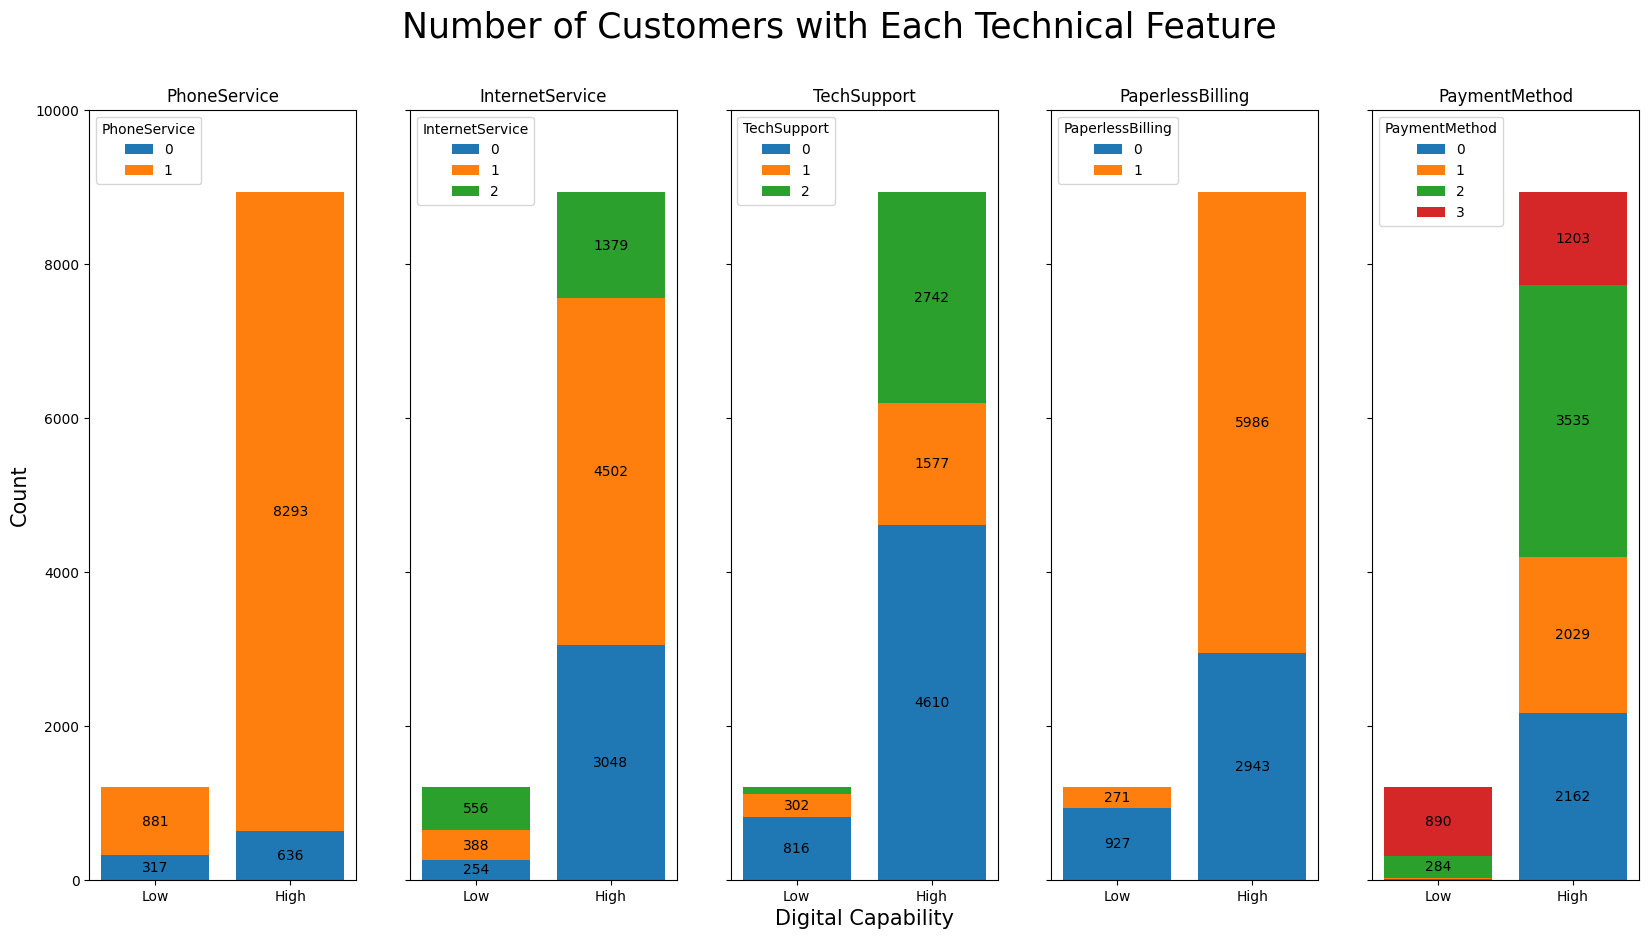

In [112]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10), sharey=True)

for i, feature in enumerate(digital_features):
    counts = final_df.groupby('Digital_Capability')[feature].value_counts().unstack(fill_value=0)

    curr_height = np.zeros(len(counts))

    for category in counts.columns:
        axes[i].bar(counts.index, counts[category], bottom=curr_height, label=category)
        curr_height += counts[category]

        for j, count in enumerate(counts[category]):
            if count > 100:
                axes[i].text(j, curr_height[j]-count/2, count,
                            ha='center', va='center', fontsize=10)
    
    axes[i].set_ylim(0, 10000)
    axes[i].set_title(feature)
    axes[i].set_xticks(counts.index)
    axes[i].set_xticklabels(['Low', 'High'])
    axes[i].legend(title=feature, bbox_to_anchor=(0,1), loc='upper left')

axes[0].set_ylabel('Count', fontsize=15)
axes[2].set_xlabel('Digital Capability', fontsize=15)
plt.suptitle('Number of Customers with Each Technical Feature', fontsize=25)
plt.show()

### 2.3.3 Normalised Bar Plot for the Number of Customers with Each Digital Feature

We normalise the previous plot to have a clearer sense about the proportion of customers with each digital featue.

/var/folders/yn/5n1n65mx1gj_05gy9sfw9y4c0000gn/T/ipykernel_37309/4050835723.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].text(j, curr_height[j]-proportion/2, f'{round(proportion*100, 1)}%', ha='center', va='center', fontsize=10)
/var/folders/yn/5n1n65mx1gj_05gy9sfw9y4c0000gn/T/ipykernel_37309/4050835723.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].text(j, curr_height[j]-proportion/2, f'{round(proportion*100, 1)}%', ha='center', va='center', fontsize=10)
/var/folders/yn/5n1n65mx1gj_05gy9sfw9y4c0000gn/T/ipykernel_37309/4050835723.py:14: FutureWarning: Series.__getitem__ treating keys as 

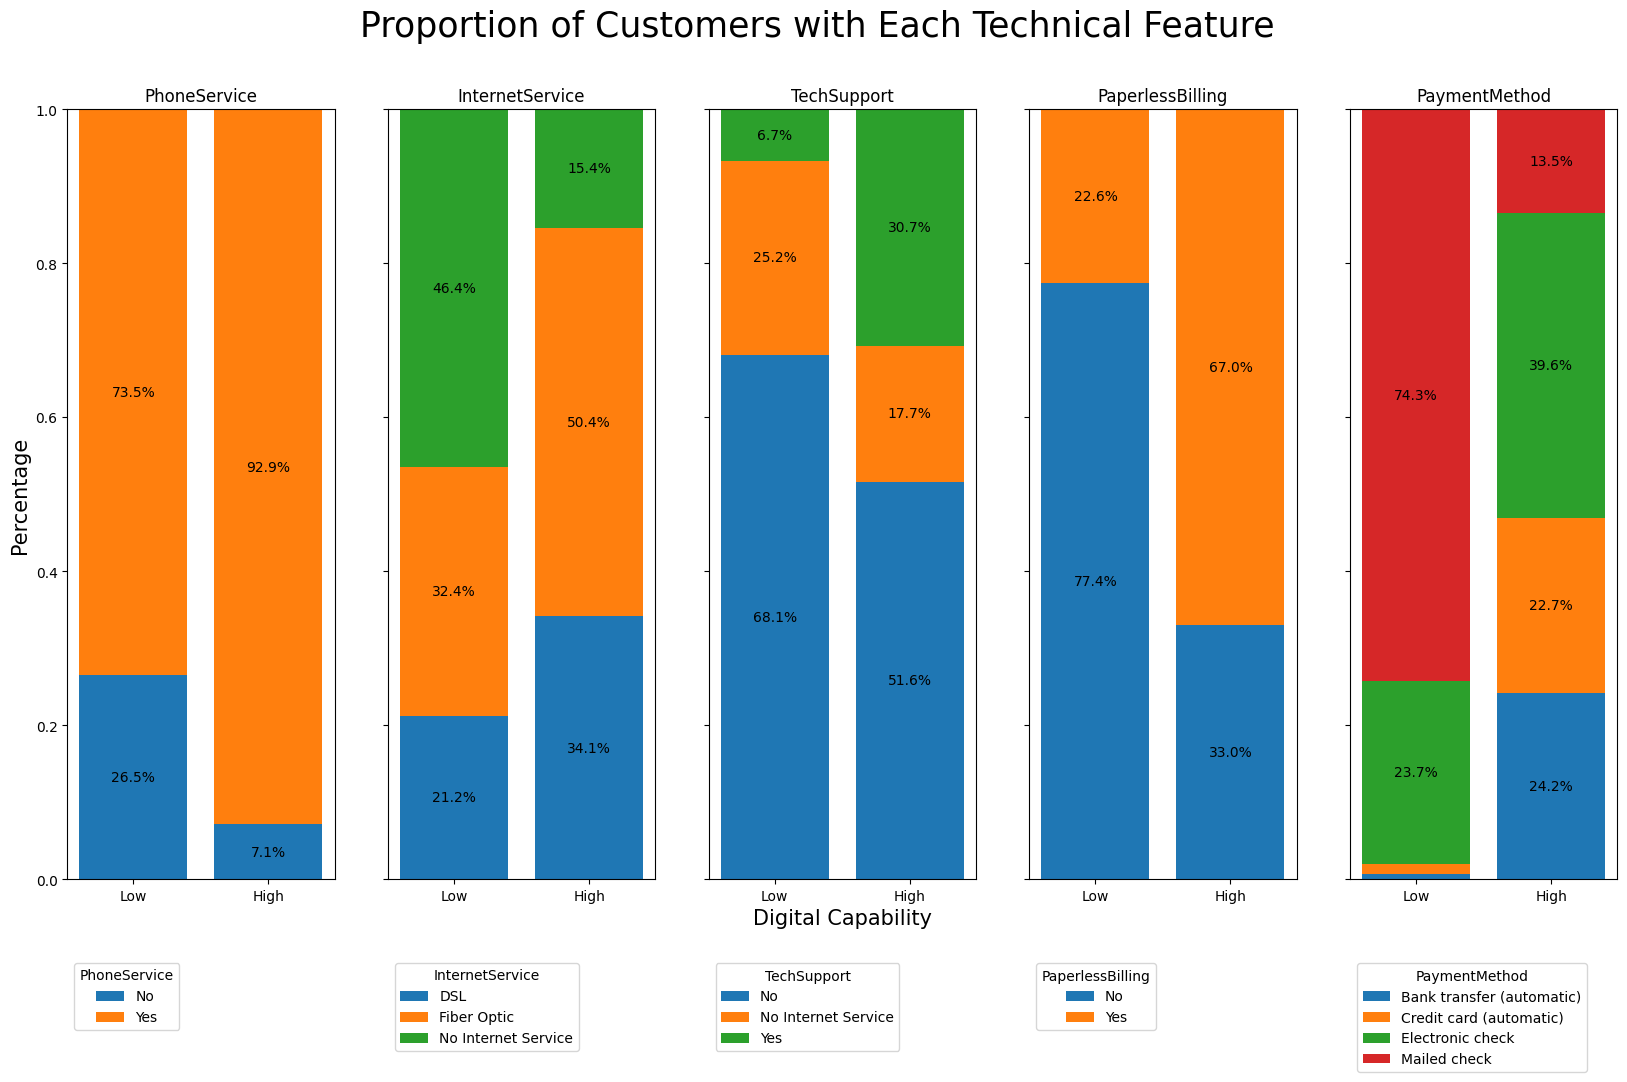

In [113]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10), sharey=True)

for i, feature in enumerate(digital_features):
    proportions = digital_df.groupby('Digital_Capability')[feature].value_counts(normalize=True).unstack(fill_value=0)

    curr_height = np.zeros(len(proportions))

    for category in proportions.columns:
        axes[i].bar(proportions.index, proportions[category], bottom=curr_height, label=category)
        curr_height += proportions[category]

        for j, proportion in enumerate(proportions[category]):
            if proportion > 0.05:
                axes[i].text(j, curr_height[j]-proportion/2, f'{round(proportion*100, 1)}%', ha='center', va='center', fontsize=10)
    
    axes[i].set_ylim(0, 1)
    axes[i].set_title(feature)
    axes[i].set_xticks(proportions.index)
    axes[i].set_xticklabels(['Low', 'High'])
    axes[i].legend(title=feature, bbox_to_anchor=(0,-0.10), loc='upper left')

axes[0].set_ylabel('Percentage', fontsize=15)
axes[2].set_xlabel('Digital Capability', fontsize=15)
plt.suptitle('Proportion of Customers with Each Technical Feature', fontsize=25)
plt.show()

### 2.3.4 Evaluation on Digital Engagement

The key findings about digital engagement: 
1. Most customers have phone service, regardless of their level of digital capability.
2. Nearly half of the customers with low digital capability and most customers with high digital capability have access to internet.
3. Most customers with low digital capability are using mailed check for payment, while customers with high digital capability are using automatic payment methods or at least electronic check. 

Some possibles ways to improve the effectiveness of bank campaigns are:
1. Using phone call to promote the campaign, ensuring customers from both digital capability groups have access to the information about the campaign. 
2. However, since most customers have access to the Internet, the bank should still use the internet as the main channel of promotion which is more cost-efficient than phone calls.
3. The bank can provide some benefits to customers using automatic payment methods, preserving the loyalty of customers that are already them and increasing work efficiency by attracting more customers to use them. 
